In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pylab as plt 
import pandas as pd 
import seaborn as sns 
sns.set_style('ticks');


In [2]:
def get_2MM_pos(s):
    
    s2 = s.split(':')
    
    bp1 = s2[0]
    
    bp2 = s2[1]
    
    pos1 = int(bp1[:-1])

    pos2 = int(bp2[:-1])
    
    positions = (pos1, pos2)
    
    return(positions)

In [3]:
def Bootstrap_Sample(data):
    '''
    This function creates one set of bootstrapped data (A bootstrap sample)

    INPUT
    -----
    data ---> np.array :: Original dataset

    OUTPUT
    ------
    np.array --> The bootstrap sample

    '''
    if len(data) > 1:
        sample = np.random.randint(0,len(data)-1,size = data.shape)
        return data[sample]
    else:
        return data

def bootstrap_intensities(intensity, nruns):
    bstrp_intensity = []
    for run in range(nruns):
        bstrp_data = Bootstrap_Sample(intensity)
        bstrp_intensity.append(np.median(bstrp_data))
    return  np.std(bstrp_intensity)

In [17]:

from IPython.display import clear_output

data = pd.read_csv('../Data_Boyle/raw_fluor_data.10nM.rep1.txt',delimiter='\t')
data['pre_association'] = data['pre_association'].fillna(0)
data['delta Intensity'] = data['pre_dissociation']-data['pre_association']
data = data[['mutations', 'nmut', 'delta Intensity']]


Grouped_data = data.groupby(by='mutations').median()

nruns = 100
bstrp_errors = []
for i, mut in enumerate(Grouped_data.index):
    subset = data[data.mutations==mut].copy()
    intensity = np.array(subset['delta Intensity'].dropna())
    bstrp_errors.append( bootstrap_intensities(intensity, nruns))
    
    
        
    
    if np.mod(i,100) == 0:
        clear_output()
        print "percentage finished: ", (float(i)+1)/len(Grouped_data.index) * 100 

        
clear_output()
print "percentage finished: ", (float(i)+1)/len(Grouped_data.index) * 100 

percentage finished:  100.0


In [18]:
WT_intensity = Grouped_data[Grouped_data['nmut']==0]['delta Intensity'].iloc[0]
Grouped_data['Ratio'] = Grouped_data['delta Intensity']/WT_intensity    
Grouped_data['se'] = bstrp_errors

Grouped_data['rel_err'] = Grouped_data['se']/Grouped_data['delta Intensity']
Grouped_data['rel_err_Ratio'] = np.sqrt(Grouped_data['rel_err']**2+ np.array(Grouped_data[Grouped_data['nmut']==0]['rel_err'])[0]**2 )
Grouped_data.loc[len(Grouped_data)-1,'rel_err_Ratio'] = 0.0

Grouped_data.reset_index(inplace=True)

In [20]:
Grouped_data.to_csv('../Data_Boyle/occupancy_rep1_processed_with_errors.txt')

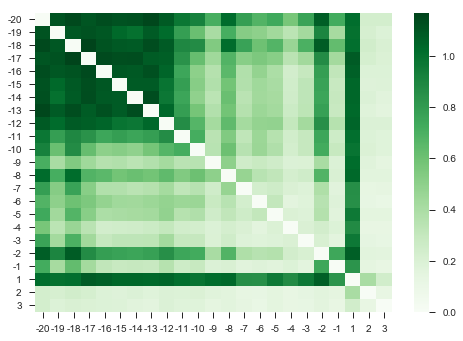

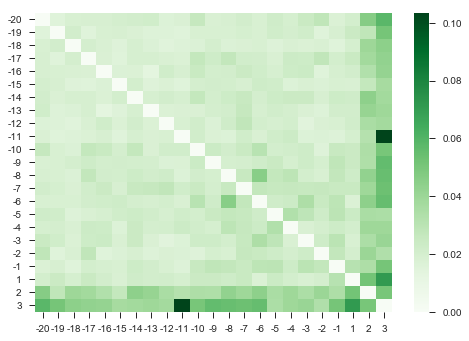

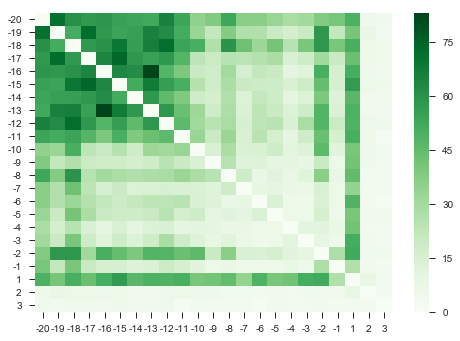

In [23]:
data = pd.read_csv('../Data_Boyle/occupancy_rep1_processed_with_errors.txt',index_col=0)

double_MM = data[data['nmut']==2][['mutations', 'Ratio','rel_err_Ratio']]

double_MM['MM pos'] = double_MM['mutations'].apply(get_2MM_pos)

double_MM = double_MM[['MM pos', 'Ratio','rel_err_Ratio']]

double_MM['se2'] = double_MM['rel_err_Ratio']**2


Mean_double_MM = pd.DataFrame()

Mean_double_MM['Ratio'] = double_MM.groupby('MM pos')['Ratio'].mean()

Mean_double_MM['se'] = double_MM.groupby('MM pos')['se2'].sum().apply(np.sqrt) / double_MM.groupby('MM pos')['se2'].count()

Mean_double_MM['rel_error'] = np.abs(Mean_double_MM['Ratio'] / Mean_double_MM['se'])

Mean_double_MM.reset_index(inplace=True)

Mean_double_MM['MM1'] = Mean_double_MM['MM pos'].apply(lambda x:x[0])

Mean_double_MM['MM2'] = Mean_double_MM['MM pos'].apply(lambda x:x[1])

Mean_double_MM

Mean_double_MM = Mean_double_MM[['MM1', 'MM2', 'Ratio','se','rel_error']]

data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.Ratio[index]
    data_mat[second,first]=value
    data_mat[first,second]=value

    
    
Boyle_index = [3,2,1] + range(-1,-21,-1)
Heatmap = sns.heatmap(data_mat,cmap='Greens')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);




data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.se[index]
    data_mat[second,first]=value
    data_mat[first,second]=value
plt.figure()
Heatmap = sns.heatmap(data_mat,cmap='Greens')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);



data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.rel_error[index]
    data_mat[second,first]=value
    data_mat[first,second]=value
plt.figure()
Heatmap = sns.heatmap(data_mat,cmap='Greens')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);

### kon.1nM.rep1

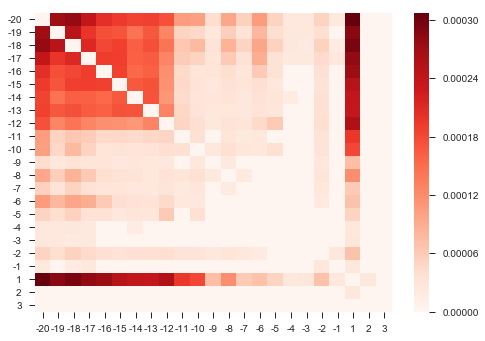

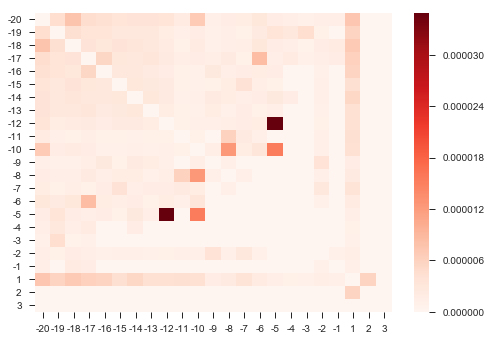

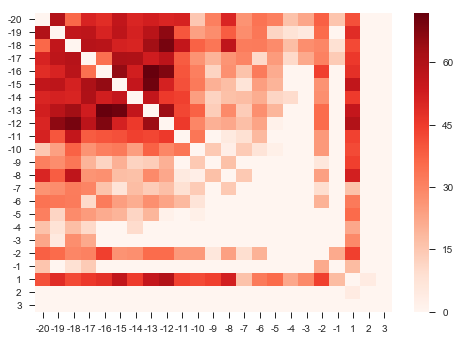

In [69]:
data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep1.txt',delimiter='\t')

double_MM = data[data['nmut']==2][['mutations', 'slope','se']]

double_MM['MM pos'] = double_MM['mutations'].apply(get_2MM_pos)

double_MM = double_MM[['MM pos', 'slope','se']]

double_MM['se2'] = double_MM['se']**2


Mean_double_MM = pd.DataFrame()

Mean_double_MM['slope'] = double_MM.groupby('MM pos')['slope'].mean()

Mean_double_MM['se'] = double_MM.groupby('MM pos')['se2'].sum().apply(np.sqrt) / double_MM.groupby('MM pos')['se2'].count()

Mean_double_MM['rel_error'] = np.abs(Mean_double_MM['slope'] / Mean_double_MM['se'])

Mean_double_MM.reset_index(inplace=True)

Mean_double_MM['MM1'] = Mean_double_MM['MM pos'].apply(lambda x:x[0])

Mean_double_MM['MM2'] = Mean_double_MM['MM pos'].apply(lambda x:x[1])

Mean_double_MM

Mean_double_MM = Mean_double_MM[['MM1', 'MM2', 'slope','se','rel_error']]

data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.slope[index]
    data_mat[second,first]=value
    data_mat[first,second]=value

    
    
Boyle_index = [3,2,1] + range(-1,-21,-1)
Heatmap = sns.heatmap(data_mat,cmap='Reds')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);




data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.se[index]
    data_mat[second,first]=value
    data_mat[first,second]=value
plt.figure()
Heatmap = sns.heatmap(data_mat,cmap='Reds')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);



data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.rel_error[index]
    data_mat[second,first]=value
    data_mat[first,second]=value
plt.figure()
Heatmap = sns.heatmap(data_mat,cmap='Reds')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);

### kon.1nM.rep2.txt

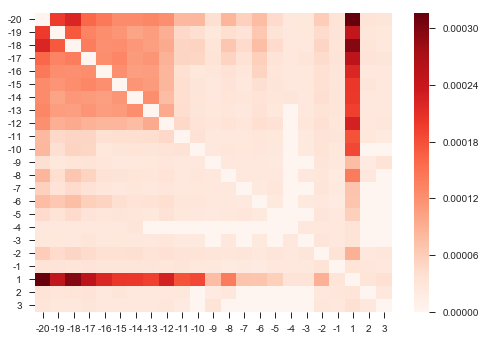

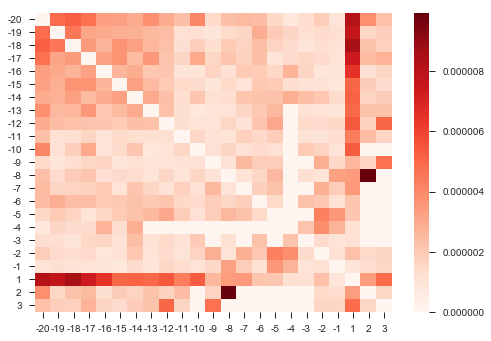

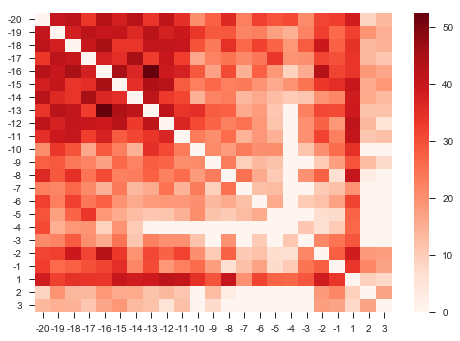

In [68]:
data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep2.txt',delimiter='\t')

double_MM = data[data['nmut']==2][['mutations', 'slope','se']]

double_MM['MM pos'] = double_MM['mutations'].apply(get_2MM_pos)

double_MM = double_MM[['MM pos', 'slope','se']]

double_MM['se2'] = double_MM['se']**2


Mean_double_MM = pd.DataFrame()

Mean_double_MM['slope'] = double_MM.groupby('MM pos')['slope'].mean()

Mean_double_MM['se'] = double_MM.groupby('MM pos')['se2'].sum().apply(np.sqrt) / double_MM.groupby('MM pos')['se2'].count()

Mean_double_MM['rel_error'] = np.abs(Mean_double_MM['slope'] / Mean_double_MM['se'])

Mean_double_MM.reset_index(inplace=True)

Mean_double_MM['MM1'] = Mean_double_MM['MM pos'].apply(lambda x:x[0])

Mean_double_MM['MM2'] = Mean_double_MM['MM pos'].apply(lambda x:x[1])

Mean_double_MM

Mean_double_MM = Mean_double_MM[['MM1', 'MM2', 'slope','se','rel_error']]

data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.slope[index]
    data_mat[second,first]=value
    data_mat[first,second]=value

    
    
Boyle_index = [3,2,1] + range(-1,-21,-1)
Heatmap = sns.heatmap(data_mat,cmap='Reds')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);




data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.se[index]
    data_mat[second,first]=value
    data_mat[first,second]=value
plt.figure()
Heatmap = sns.heatmap(data_mat,cmap='Reds')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);



data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.rel_error[index]
    data_mat[second,first]=value
    data_mat[first,second]=value
plt.figure()
Heatmap = sns.heatmap(data_mat,cmap='Reds')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);

### koff.10nM.rep1.txt

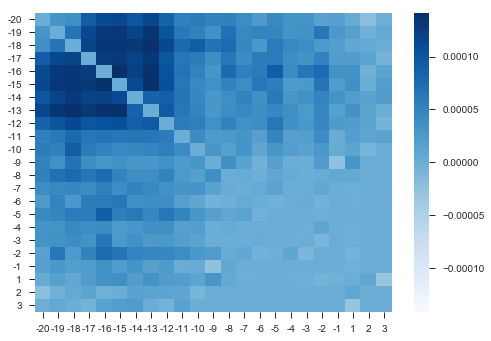

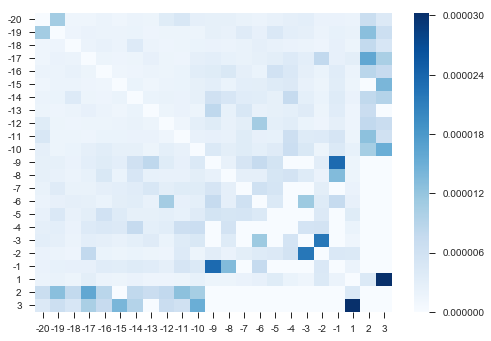

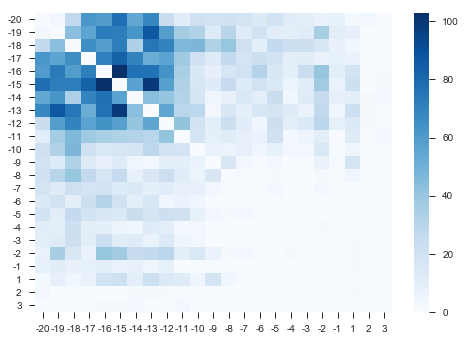

In [64]:
data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.off.10nM.rep1.txt',delimiter='\t')

double_MM = data[data['nmut']==2][['mutations', 'slope','se']]

double_MM['MM pos'] = double_MM['mutations'].apply(get_2MM_pos)

double_MM = double_MM[['MM pos', 'slope','se']]

double_MM['se2'] = double_MM['se']**2

double_MM['slope'] = -double_MM['slope']


Mean_double_MM = pd.DataFrame()

Mean_double_MM['slope'] = double_MM.groupby('MM pos')['slope'].mean()

Mean_double_MM['se'] = double_MM.groupby('MM pos')['se2'].sum().apply(np.sqrt) / double_MM.groupby('MM pos')['se2'].count()

Mean_double_MM['rel_error'] = np.abs(Mean_double_MM['slope'] / Mean_double_MM['se'])

Mean_double_MM.reset_index(inplace=True)

Mean_double_MM['MM1'] = Mean_double_MM['MM pos'].apply(lambda x:x[0])

Mean_double_MM['MM2'] = Mean_double_MM['MM pos'].apply(lambda x:x[1])

Mean_double_MM

Mean_double_MM = Mean_double_MM[['MM1', 'MM2', 'slope','se','rel_error']]

data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.slope[index]
    data_mat[second,first]=value
    data_mat[first,second]=value

    
    
Boyle_index = [3,2,1] + range(-1,-21,-1)
Heatmap = sns.heatmap(data_mat,cmap='Blues')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);




data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.se[index]
    data_mat[second,first]=value
    data_mat[first,second]=value
plt.figure()
Heatmap = sns.heatmap(data_mat,cmap='Blues')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);



data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.rel_error[index]
    data_mat[second,first]=value
    data_mat[first,second]=value
plt.figure()
Heatmap = sns.heatmap(data_mat,cmap='Blues')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);
# #Heatmap.invert_xaxis()
# # plt.savefig('Replica1.pdf',format='pdf',bbox_inches='tight')

### koff.10nM.rep2.txt

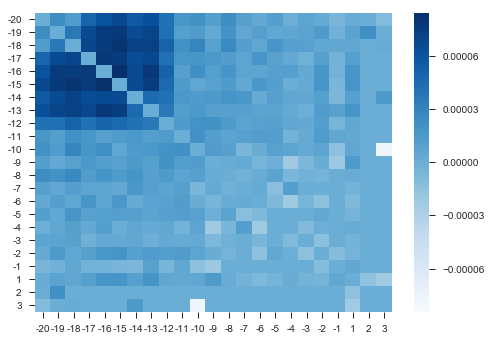

In [11]:
data = pd.read_csv('second_fit_data.summarized.off.10nM.rep2.txt',delimiter='\t')

double_MM = data[data['nmut']==2][['mutations', 'slope']]

double_MM['MM pos'] = double_MM['mutations'].apply(get_2MM_pos)

double_MM = double_MM[['MM pos', 'slope']]

double_MM['slope'] = -double_MM['slope']

Mean_double_MM = double_MM.groupby('MM pos').mean().reset_index()

Mean_double_MM['MM1'] = Mean_double_MM['MM pos'].apply(lambda x:x[0])

Mean_double_MM['MM2'] = Mean_double_MM['MM pos'].apply(lambda x:x[1])

Mean_double_MM = Mean_double_MM[['MM1', 'MM2', 'slope']]

data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.slope[index]
    data_mat[second,first]=value
    data_mat[first,second]=value

    
    
Boyle_index = [3,2,1] + range(-1,-21,-1)
Heatmap = sns.heatmap(data_mat,cmap='Blues')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);
#Heatmap.invert_xaxis()
plt.savefig('Replica1.pdf',format='pdf',bbox_inches='tight')

### kon.10nM.rep1.txt

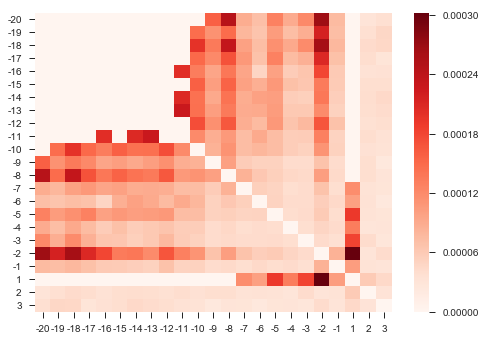

In [16]:
data = pd.read_csv('second_fit_data.summarized.on.10nM.rep1.txt',delimiter='\t')

double_MM = data[data['nmut']==2][['mutations', 'slope']]

double_MM['MM pos'] = double_MM['mutations'].apply(get_2MM_pos)

double_MM = double_MM[['MM pos', 'slope']]

Mean_double_MM = double_MM.groupby('MM pos').mean().reset_index()

Mean_double_MM['MM1'] = Mean_double_MM['MM pos'].apply(lambda x:x[0])

Mean_double_MM['MM2'] = Mean_double_MM['MM pos'].apply(lambda x:x[1])

Mean_double_MM = Mean_double_MM[['MM1', 'MM2', 'slope']]

data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.slope[index]
    data_mat[second,first]=value
    data_mat[first,second]=value

    
    
Boyle_index = [3,2,1] + range(-1,-21,-1)
Heatmap = sns.heatmap(data_mat,cmap='Reds')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);
#Heatmap.invert_xaxis()
plt.savefig('Replica1.pdf',format='pdf',bbox_inches='tight')

data_mat_kon_10mM_rep1 = data_mat.copy()

### kon.10nM.rep2.txt

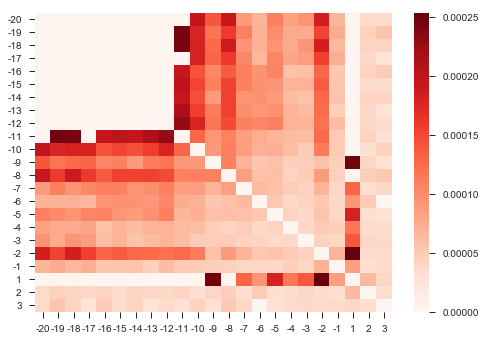

In [14]:
data = pd.read_csv('second_fit_data.summarized.on.10nM.rep2.txt',delimiter='\t')

double_MM = data[data['nmut']==2][['mutations', 'slope']]

double_MM['MM pos'] = double_MM['mutations'].apply(get_2MM_pos)

double_MM = double_MM[['MM pos', 'slope']]

Mean_double_MM = double_MM.groupby('MM pos').mean().reset_index()

Mean_double_MM['MM1'] = Mean_double_MM['MM pos'].apply(lambda x:x[0])

Mean_double_MM['MM2'] = Mean_double_MM['MM pos'].apply(lambda x:x[1])

Mean_double_MM = Mean_double_MM[['MM1', 'MM2', 'slope']]

data_mat = np.zeros((23,23))
N = 22 
for index in range(len(Mean_double_MM)):
    first = Mean_double_MM.MM1[index]
    second = Mean_double_MM.MM2[index]
    value = Mean_double_MM.slope[index]
    data_mat[second,first]=value
    data_mat[first,second]=value

    
    
Boyle_index = [3,2,1] + range(-1,-21,-1)
Heatmap = sns.heatmap(data_mat,cmap='Reds')
Heatmap.set_xticklabels(Boyle_index[::-1]);
Heatmap.set_yticklabels(Boyle_index,rotation=0);
#Heatmap.invert_xaxis()
plt.savefig('Replica1.pdf',format='pdf',bbox_inches='tight')

In [18]:
data_mat_kon_10mM_rep1/data_mat_kon_1mM_rep1

C:\Users\beslamimossall\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
C:\Users\beslamimossall\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


array([[        nan,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  3.86169088,  2.56738002,  1.64711693,  0.6725743 ,
         2.51354062,  3.91822784,  5.16659168,  5.15023032,  3.46269317,
         0.        ,         inf,         inf],
       [ 0.        ,         nan,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         3.23245595,  4.13479364,  2.59531639,  2.32275789,  0.83117494,
         2.58452699,  3.10090785,  3.7434535 ,  5.41669413,         inf,
         0.        ,         inf,         inf],
       [ 0.        ,  0.        ,         nan,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.56062285,  3.95792201,  2.76372833,  1.91265787,  0.7548764 ,
         2.13654757,  3.64201576,  5.61169844,  4.9690634 ,  4.22594067,
         0.        ,        